**Task**:
    
    analysis of several time series data (AO, NAO)

**Modules**:
    
    pandas

[**Notebook file**](http://nbviewer.ipython.org/urls/github.com/koldunovn/earthpy.org/raw/master/content/earthpy_pandas_basics.ipynb)   

Here I am going to show just some basic [pandas](http://pandas.pydata.org/) stuff for time series analysis, as I think for the Earth Scientists it's the most interesting topic. If you find this small tutorial useful, I encourage you to watch [this video](http://pyvideo.org/video/1198/time-series-data-analysis-with-pandas), where Wes McKinney give extensive introduction to the time series data analysis with pandas.

On the official website you can find explanation of what problems pandas solve in general, but I can tell you what problem pandas solve for me. It makes analysis and visualisation of 1D data, especially time series, MUCH faster. Before pandas working with time series in python was a pain for me, now it's fun. Ease of use stimulate in-depth exploration of the data: why wouldn't you make some additional analysis if it's just one line of code? Hope you will also find this great tool helpful and useful. So, let's begin.

As an example we are going to use time series of [Arctic Oscillation (AO)](http://en.wikipedia.org/wiki/Arctic_oscillation) and [North Atlantic Oscillation (NAO)](http://en.wikipedia.org/wiki/North_Atlantic_oscillation) data sets.

## Module import

First we have to import necessary modules:

In [2]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame, Panel
#pd.set_printoptions(max_rows=15) # this limit maximum numbers of rows

And "switch on" inline graphic for the notebook:

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Pandas developing very fast, and while we are going to use only basic functionality, some details may still change in the newer versions. This example will only work in version > 0.8. Check yours:

In [4]:
pd.__version__

u'0.19.2'

## Loading data

Now, when we are done with preparations, let's get some data. If you work on Windows download monthly AO data [from here](http://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/monthly.ao.index.b50.current.ascii). If you on *nix machine, you can do it directly from ipython notebook using system call to wget command:

In [5]:
!wget http://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/monthly.ao.index.b50.current.ascii

--2017-10-24 09:11:26--  http://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/monthly.ao.index.b50.current.ascii
Resolving www.cpc.ncep.noaa.gov... 140.90.101.63
Connecting to www.cpc.ncep.noaa.gov|140.90.101.63|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20325 (20K) [text/plain]
Saving to: 'monthly.ao.index.b50.current.ascii'

monthly.ao.index.b5 100%[=====================>]  19.85K  --.-KB/s   in 0.1s   

2017-10-24 09:11:27 (155 KB/s) - 'monthly.ao.index.b50.current.ascii' saved [20325/20325]



Pandas has very good IO capabilities, but we not going to use them in this tutorial in order to keep things simple. For now we open the file simply with numpy loadtxt:

In [6]:
ao = np.loadtxt('monthly.ao.index.b50.current.ascii')

Every line in the file consist of three elements: year, month, value:

In [7]:
ao[0:2]

array([[  1.95000000e+03,   1.00000000e+00,  -6.03100000e-02],
       [  1.95000000e+03,   2.00000000e+00,   6.26810000e-01]])

And here is the shape of our array:

In [8]:
ao.shape

(813, 3)

## Time Series

We would like to convert this data in to time series, that can be manipulated naturally and easily. First step, that we have to do is to create the range of dates for our time series. From the file it is clear, that record starts at January 1950 and ends at February 2013 (at the time I am writing this, of course). Frequency of the data is one month (freq='M'). 

In [28]:
dates = pd.date_range('1950-01', '2017-10', freq='M')

As you see syntax is quite simple, and this is one of the reasons why I love Pandas so much :) Another thing to mention, is that we put March 2003 instead of February because the interval is open on the right side. You can check if the range of dates is properly generated:

In [29]:
dates

DatetimeIndex(['1950-01-31', '1950-02-28', '1950-03-31', '1950-04-30',
               '1950-05-31', '1950-06-30', '1950-07-31', '1950-08-31',
               '1950-09-30', '1950-10-31',
               ...
               '2016-12-31', '2017-01-31', '2017-02-28', '2017-03-31',
               '2017-04-30', '2017-05-31', '2017-06-30', '2017-07-31',
               '2017-08-31', '2017-09-30'],
              dtype='datetime64[ns]', length=813, freq='M')

In [30]:
dates.shape

(813,)

Now we are ready to create our first time series. Dates from the *dates* variable will be our index, and AO values will be our, hm... values:

In [31]:
AO = Series(ao[:,2], index=dates)

In [32]:
AO

1950-01-31   -0.060310
1950-02-28    0.626810
1950-03-31   -0.008127
1950-04-30    0.555100
1950-05-31    0.071577
1950-06-30    0.538570
1950-07-31   -0.802480
1950-08-31   -0.851010
1950-09-30    0.357970
1950-10-31   -0.378900
1950-11-30   -0.515110
1950-12-31   -1.928100
1951-01-31   -0.084969
1951-02-28   -0.399930
1951-03-31   -1.934100
1951-04-30   -0.776480
1951-05-31   -0.862780
1951-06-30   -0.917860
1951-07-31    0.090023
1951-08-31   -0.377410
1951-09-30   -0.817780
1951-10-31   -0.212910
1951-11-30   -0.068519
1951-12-31    1.987200
1952-01-31    0.368250
1952-02-29   -1.747200
1952-03-31   -1.859500
1952-04-30    0.538520
1952-05-31   -0.773510
1952-06-30   -0.440930
                ...   
2015-04-30    1.215700
2015-05-31    0.762760
2015-06-30    0.427040
2015-07-31   -1.107900
2015-08-31   -0.689020
2015-09-30   -0.164510
2015-10-31   -0.250060
2015-11-30    1.945000
2015-12-31    1.444100
2016-01-31   -1.448700
2016-02-29   -0.023521
2016-03-31    0.280240
2016-04-30 

Now we can plot complete time series:

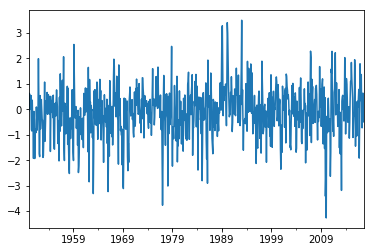

In [33]:
AO.plot()

or its part:

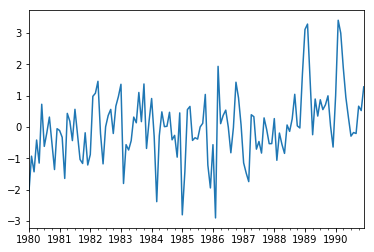

In [34]:
AO['1980':'1990'].plot()

or even smaller part:

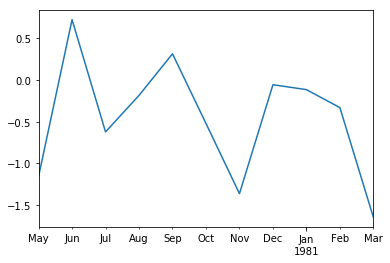

In [35]:
AO['1980-05':'1981-03'].plot()

Reference to the time periods is done in a very natural way. You, of course, can also get individual values. By number: 

In [36]:
AO[120]

-2.4842

or by index (date in our case):

In [37]:
AO['1960-01']

1960-01-31   -2.4842
Freq: M, dtype: float64

And what if we choose only one year?

In [38]:
AO['1960']

1960-01-31   -2.484200
1960-02-29   -2.212400
1960-03-31   -1.624600
1960-04-30   -0.297310
1960-05-31   -0.857430
1960-06-30    0.054978
1960-07-31   -0.619060
1960-08-31   -1.007900
1960-09-30   -0.381640
1960-10-31   -1.187000
1960-11-30   -0.553230
1960-12-31   -0.342950
Freq: M, dtype: float64

Isn't that great? :)

One bonus example :)

In [39]:
AO[AO > 0]

1950-02-28    0.626810
1950-04-30    0.555100
1950-05-31    0.071577
1950-06-30    0.538570
1950-09-30    0.357970
1951-07-31    0.090023
1951-12-31    1.987200
1952-01-31    0.368250
1952-04-30    0.538520
1952-07-31    0.383080
1953-03-31    1.068300
1953-06-30    0.022535
1953-07-31    0.333170
1953-08-31    0.084960
1953-09-30    0.661610
1953-11-30    0.353600
1953-12-31    0.575470
1954-03-31    0.475720
1954-04-30    0.511690
1954-07-31    0.340890
1954-09-30    0.301500
1954-10-31    0.512570
1954-12-31    0.552590
1955-04-30    0.194230
1955-05-31    0.241610
1955-07-31    0.331940
1955-08-31    0.760120
1955-09-30    0.356760
1955-10-31    0.099053
1956-03-31    0.470360
                ...   
2013-08-31    0.154250
2013-10-31    0.262760
2013-11-30    2.029000
2013-12-31    1.474900
2014-02-28    0.043775
2014-03-31    1.205800
2014-04-30    0.971970
2014-05-31    0.464210
2014-09-30    0.101910
2014-12-31    0.412920
2015-01-31    1.091600
2015-02-28    1.042600
2015-03-31 

## Data Frame

Now let's make live a bit more interesting and download more data. This will be NOA time series (Windowd users can get it [here](http://www.cpc.ncep.noaa.gov/products/precip/CWlink/pna/norm.nao.monthly.b5001.current.ascii)).

In [40]:
!wget http://www.cpc.ncep.noaa.gov/products/precip/CWlink/pna/norm.nao.monthly.b5001.current.ascii

--2017-10-24 09:16:32--  http://www.cpc.ncep.noaa.gov/products/precip/CWlink/pna/norm.nao.monthly.b5001.current.ascii
Resolving www.cpc.ncep.noaa.gov... 140.90.101.63
Connecting to www.cpc.ncep.noaa.gov|140.90.101.63|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19512 (19K) [text/plain]
Saving to: 'norm.nao.monthly.b5001.current.ascii'

norm.nao.monthly.b5 100%[=====================>]  19.05K  --.-KB/s   in 0.1s   

2017-10-24 09:16:33 (150 KB/s) - 'norm.nao.monthly.b5001.current.ascii' saved [19512/19512]



Create Series the same way as we did for AO:

In [42]:
nao = np.loadtxt('norm.nao.monthly.b5001.current.ascii')
dates_nao = pd.date_range('1950-01', '2017-10', freq='M')
NAO = Series(nao[:,2], index=dates_nao)

Time period is the same:

In [43]:
NAO.index

DatetimeIndex(['1950-01-31', '1950-02-28', '1950-03-31', '1950-04-30',
               '1950-05-31', '1950-06-30', '1950-07-31', '1950-08-31',
               '1950-09-30', '1950-10-31',
               ...
               '2016-12-31', '2017-01-31', '2017-02-28', '2017-03-31',
               '2017-04-30', '2017-05-31', '2017-06-30', '2017-07-31',
               '2017-08-31', '2017-09-30'],
              dtype='datetime64[ns]', length=813, freq='M')

Now we create Data Frame, that will contain both AO and NAO data. It sort of an Excel table where the first row contain headers for the columns and firs column is an index:

In [44]:
aonao = DataFrame({'AO' : AO, 'NAO' : NAO})

One can plot the data straight away:

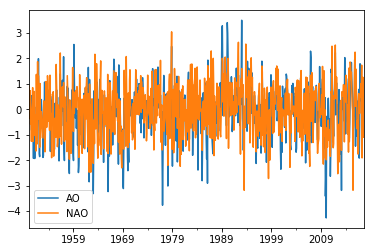

In [45]:
aonao.plot()

Or have a look at the first several rows:

In [46]:
aonao.head()

,AO,NAO
1950-01-31,-0.060310,0.92
1950-02-28,0.626810,0.40
1950-03-31,-0.008127,-0.36
1950-04-30,0.555100,0.73
1950-05-31,0.071577,-0.59


We can reference each column by its name:

In [47]:
aonao['NAO']

1950-01-31    0.920000
1950-02-28    0.400000
1950-03-31   -0.360000
1950-04-30    0.730000
1950-05-31   -0.590000
1950-06-30   -0.060000
1950-07-31   -1.260000
1950-08-31   -0.050000
1950-09-30    0.250000
1950-10-31    0.850000
1950-11-30   -1.260000
1950-12-31   -1.020000
1951-01-31    0.080000
1951-02-28    0.700000
1951-03-31   -1.020000
1951-04-30   -0.220000
1951-05-31   -0.590000
1951-06-30   -1.640000
1951-07-31    1.370000
1951-08-31   -0.220000
1951-09-30   -1.360000
1951-10-31    1.870000
1951-11-30   -0.390000
1951-12-31    1.320000
1952-01-31    0.930000
1952-02-29   -0.830000
1952-03-31   -1.490000
1952-04-30    1.010000
1952-05-31   -1.120000
1952-06-30   -0.400000
                ...   
2015-04-30    0.725350
2015-05-31    0.145520
2015-06-30   -0.066822
2015-07-31   -3.179000
2015-08-31   -0.760360
2015-09-30   -0.648460
2015-10-31    0.437230
2015-11-30    1.743800
2015-12-31    2.243600
2016-01-31    0.116520
2016-02-29    1.580300
2016-03-31    0.734400
2016-04-30 

or as method of the Data Frame variable (if name of the variable is a valid python name):

In [48]:
aonao.NAO

1950-01-31    0.920000
1950-02-28    0.400000
1950-03-31   -0.360000
1950-04-30    0.730000
1950-05-31   -0.590000
1950-06-30   -0.060000
1950-07-31   -1.260000
1950-08-31   -0.050000
1950-09-30    0.250000
1950-10-31    0.850000
1950-11-30   -1.260000
1950-12-31   -1.020000
1951-01-31    0.080000
1951-02-28    0.700000
1951-03-31   -1.020000
1951-04-30   -0.220000
1951-05-31   -0.590000
1951-06-30   -1.640000
1951-07-31    1.370000
1951-08-31   -0.220000
1951-09-30   -1.360000
1951-10-31    1.870000
1951-11-30   -0.390000
1951-12-31    1.320000
1952-01-31    0.930000
1952-02-29   -0.830000
1952-03-31   -1.490000
1952-04-30    1.010000
1952-05-31   -1.120000
1952-06-30   -0.400000
                ...   
2015-04-30    0.725350
2015-05-31    0.145520
2015-06-30   -0.066822
2015-07-31   -3.179000
2015-08-31   -0.760360
2015-09-30   -0.648460
2015-10-31    0.437230
2015-11-30    1.743800
2015-12-31    2.243600
2016-01-31    0.116520
2016-02-29    1.580300
2016-03-31    0.734400
2016-04-30 

We can simply add column to the Data Frame:

In [49]:
aonao['Diff'] = aonao['AO'] - aonao['NAO']
aonao.head()

,AO,NAO,Diff
1950-01-31,-0.060310,0.92,-0.980310
1950-02-28,0.626810,0.40,0.226810
1950-03-31,-0.008127,-0.36,0.351872
1950-04-30,0.555100,0.73,-0.174900
1950-05-31,0.071577,-0.59,0.661577


And delete it:

In [50]:
del aonao['Diff']
aonao.tail()

,AO,NAO
2017-05-31,-0.73014,-1.911000
2017-06-30,0.40166,0.045036
2017-07-31,0.63423,1.255600
2017-08-31,0.15004,-1.097700
2017-09-30,-0.49245,-0.612730


Slicing will also work:

In [51]:
aonao['1981-01':'1981-03']

,AO,NAO
1981-01-31,-0.11634,0.37
1981-02-28,-0.33158,0.92
1981-03-31,-1.64470,-1.19


even in some crazy combinations:

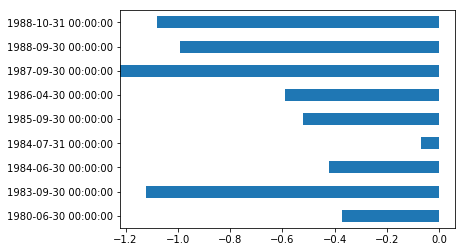

In [52]:
import datetime
aonao.ix[(aonao.AO > 0) & (aonao.NAO < 0) 
        & (aonao.index > datetime.datetime(1980,1,1)) 
        & (aonao.index < datetime.datetime(1989,1,1)),
        'NAO'].plot(kind='barh')

Here we use special [advanced indexing attribute .ix](http://pandas.pydata.org/pandas-docs/stable/indexing.html#advanced-indexing-with-labels). We choose all NAO values in the 1980s for months where AO is positive and NAO is negative, and then plot them. Magic :)

## Statistics

Back to simple stuff. We can obtain statistical information over elements of the Data Frame. Default is column wise:

In [53]:
aonao.mean()

AO    -0.112315
NAO   -0.016504
dtype: float64

In [54]:
aonao.max()

AO     3.4953
NAO    3.0400
dtype: float64

In [55]:
aonao.min()

AO    -4.2657
NAO   -3.1800
dtype: float64

You can also do it row-wise:

In [56]:
aonao.mean(1)

1950-01-31    0.429845
1950-02-28    0.513405
1950-03-31   -0.184064
1950-04-30    0.642550
1950-05-31   -0.259211
1950-06-30    0.239285
1950-07-31   -1.031240
1950-08-31   -0.450505
1950-09-30    0.303985
1950-10-31    0.235550
1950-11-30   -0.887555
1950-12-31   -1.474050
1951-01-31   -0.002485
1951-02-28    0.150035
1951-03-31   -1.477050
1951-04-30   -0.498240
1951-05-31   -0.726390
1951-06-30   -1.278930
1951-07-31    0.730012
1951-08-31   -0.298705
1951-09-30   -1.088890
1951-10-31    0.828545
1951-11-30   -0.229260
1951-12-31    1.653600
1952-01-31    0.649125
1952-02-29   -1.288600
1952-03-31   -1.674750
1952-04-30    0.774260
1952-05-31   -0.946755
1952-06-30   -0.420465
                ...   
2015-04-30    0.970525
2015-05-31    0.454140
2015-06-30    0.180109
2015-07-31   -2.143450
2015-08-31   -0.724690
2015-09-30   -0.406485
2015-10-31    0.093585
2015-11-30    1.844400
2015-12-31    1.843850
2016-01-31   -0.666090
2016-02-29    0.778390
2016-03-31    0.507320
2016-04-30 

Or get everything at once:

In [125]:
aonao.describe()

,AO,NAO
count,758.000000,758.000000
mean,-0.133043,-0.032465
std,1.003774,1.001887
min,-4.265700,-3.180000
25%,-0.671770,-0.767500
50%,-0.058805,-0.015000
75%,0.463980,0.660000
max,3.495300,3.040000


## Resampling

Pandas provide easy way to resample data to different time frequency. Two main parameters for resampling is time period you resemple to and the method that you use. By default the method is mean. Following example calculates annual ('A') mean:

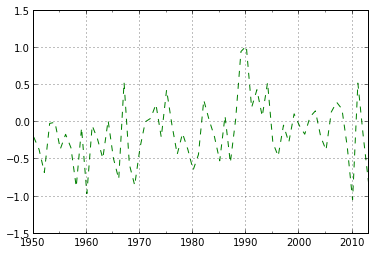

In [349]:
AO_mm = AO.resample("A")
AO_mm.plot(style='g--')

In [57]:
??AO.resample

median:

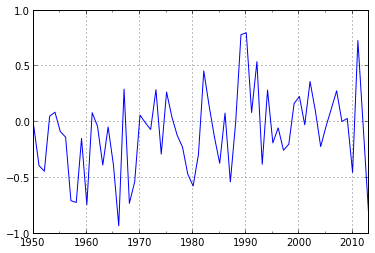

In [352]:
AO_mm = AO.resample("A", how='median')
AO_mm.plot()

You can use your methods for resampling, for example np.max (in this case we change resampling frequency to 3 years):

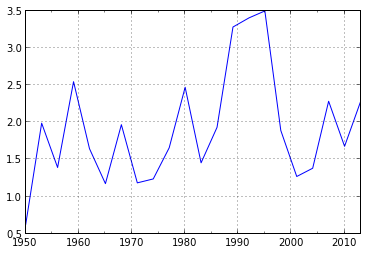

In [357]:
AO_mm = AO.resample("3A", how=np.max)
AO_mm.plot()

You can specify several functions at once as a list:

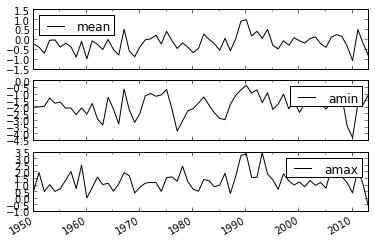

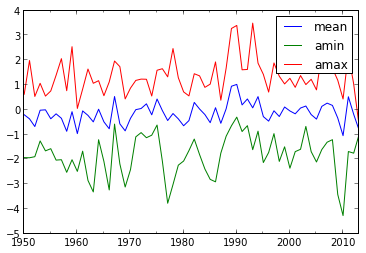

In [360]:
AO_mm = AO.resample("A", how=['mean', np.min, np.max])
AO_mm['1900':'2020'].plot(subplots=True)
AO_mm['1900':'2020'].plot()

## Moving (rolling) statistics

Pandas provide good collection of moving statistics.

Rolling mean:

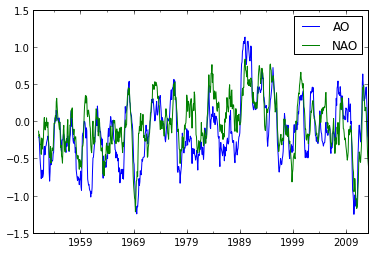

In [371]:
pd.rolling_mean(aonao, window=12).plot(style='-g')

Rolling correlation:

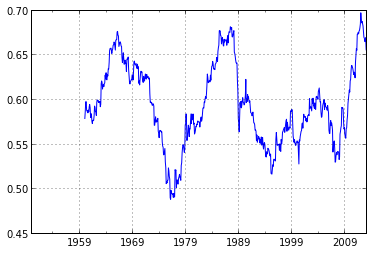

In [377]:
pd.rolling_corr(aonao.AO, aonao.NAO, window=120).plot(style='-g')

By the way getting correlation coefficients for members of the Data Frame is as simple as:

In [379]:
aonao.corr()

,AO,NAO
AO,1.000000,0.610255
NAO,0.610255,1.000000


That's it. I hope you at least get a rough impression of what pandas can do for you. Comments are very welcome (below). If you have intresting examples of pandas usage in Earth Science, we would be happy to put them on [EarthPy](http://earthpy.org).